In [35]:
import os
import sys
import csv
from collections import OrderedDict

import numpy as np
import matplotlib as mpl
import proplot as plt
import scipy

In [107]:
# mpl.pyplot.style.use("custom")
# plt.use_style(["vibrant"])  # muted color theme from SciencePlots
plt.rc["text.usetex"] = True
plt.rc["text.latex.preamble"] = r"\usepackage{siunitx}\sisetup{detect-all}\usepackage{cmbright}"
plt.rc["legend.facecolor"] = "white"
plt.rc["lines.linewidth"] = 0.75 
plt.rc["lines.markersize"] = 2
# Ticks
plt.rc["xtick.direction"] = "in"
plt.rc["ytick.direction"] = "in"

plt.rc["xtick.top"] = False
plt.rc["ytick.right"] = False

plt.rc["xtick.major.pad"] = 5
plt.rc["ytick.major.pad"] = 5

plt.rc["xtick.major.size"] = 3
plt.rc["xtick.minor.size"] = 2
plt.rc["xtick.minor.visible"] = False

plt.rc["ytick.major.size"] = 3
plt.rc["ytick.minor.size"] = 2
plt.rc["ytick.minor.visible"] = False

plt.rc["xtick.major.width"] = 0.5
plt.rc["xtick.minor.width"] = 0.3

plt.rc["ytick.major.width"] = 0.5
plt.rc["ytick.minor.width"] = 0.3

plt.rc["axes.linewidth"] = 0.6
plt.rc["axes.formatter.limits"] = -3, 4
plt.rc["axes.formatter.use_mathtext"] = True
plt.rc["axes3d.grid"] = False

In [100]:
train_losses = OrderedDict()
with open('train_loss.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)
    for name in header:
        train_losses[name] = []
    for row in reader:
        for val, name in zip(row, train_losses.keys()):
            if name.endswith("MIN") or name.endswith("MAX"):
                continue
            train_losses[name].append(float(val))

val_losses = OrderedDict()
with open('val_loss.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)
    for name in header:
        val_losses[name] = []
    for row in reader:
        for val, name in zip(row, val_losses.keys()):
            # print(val, name)
            if name.endswith("MIN") or name.endswith("MAX"):
                continue
            val_losses[name].append(float(val))


# for name in train_losses.keys():
#     if name.endswith("MIN") or name.endswith("MAX"):
#         del train_losses[name]
# for name in val_losses.keys():
#     if name.endswith("MIN") or name.endswith("MAX"):
#         val_losses.pop(name)

In [86]:
print(train_losses.keys())
print(val_losses.keys())

odict_keys(['Step', 'flash+rope+layer - train/loss', 'flash+rope+layer - train/loss__MIN', 'flash+rope+layer - train/loss__MAX', 'mqa - train/loss', 'mqa - train/loss__MIN', 'mqa - train/loss__MAX', 'flash_attn - train/loss', 'flash_attn - train/loss__MIN', 'flash_attn - train/loss__MAX', 'sparse_attn - train/loss', 'sparse_attn - train/loss__MIN', 'sparse_attn - train/loss__MAX', 'layer_norm - train/loss', 'layer_norm - train/loss__MIN', 'layer_norm - train/loss__MAX', 'rope - train/loss', 'rope - train/loss__MIN', 'rope - train/loss__MAX', 'no_features - train/loss', 'no_features - train/loss__MIN', 'no_features - train/loss__MAX'])
odict_keys(['Step', 'flash+rope+layer - val/loss', 'flash+rope+layer - val/loss__MIN', 'flash+rope+layer - val/loss__MAX', 'mqa - val/loss', 'mqa - val/loss__MIN', 'mqa - val/loss__MAX', 'flash_attn - val/loss', 'flash_attn - val/loss__MIN', 'flash_attn - val/loss__MAX', 'sparse_attn - val/loss', 'sparse_attn - val/loss__MIN', 'sparse_attn - val/loss__MAX

In [87]:
print(train_losses['Step'])
print(val_losses['Step'])

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.

In [116]:
labels = ['FA + RoPE + LN', 'MQA', "FA", "SA", "LN", "RoPE", "None"]

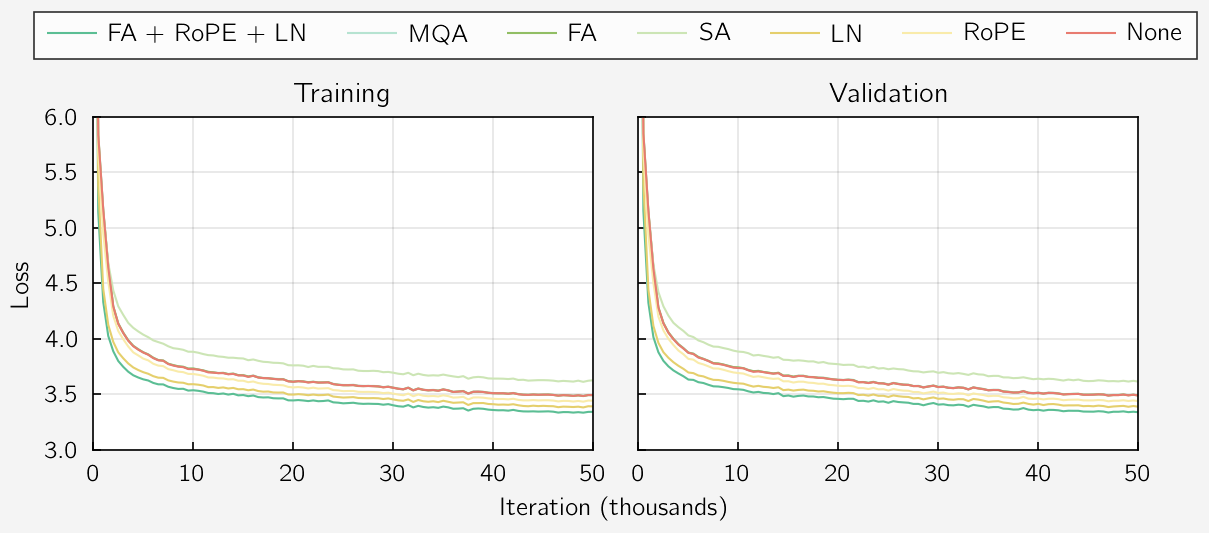

In [142]:
fig, axes = plt.subplots(ncols=2, refaspect=1.5, refwidth=2.5)
steps = train_losses['Step']
i = 0
for name, losses in val_losses.items():
    if name == 'Step' or name.endswith("MIN") or name.endswith("MAX"):
        continue
    axes[1].plot(np.array(steps) * 0.5, losses, label=labels[i], cycle='Qual2')
    i += 1
i = 0
for name, losses in train_losses.items():
    if name == 'Step' or name.endswith("MIN") or name.endswith("MAX"):
        continue
    axes[0].plot(np.array(steps) * 0.5, losses, cycle='Qual2')
    i += 1
    # print(losses)
# ax.set_yscale('log')
fig.legend(loc='t', ncols=7)
fig.format(xlabel=r"Iteration (thousands)", ylabel="Loss", ylim=[3, 6])
axes[0].format(title='Training')
axes[1].format(title='Validation')
fig.savefig("loss_curves.pdf", bbox_inches='tight')

## Compute FLOP usage

In [153]:
# relative flop = # steps * MFU 
# (MFU values are all relative, incorrectly scaled due to using different GPU)
# get val vs flop curve for each
MFU_vals = np.array([81.81, 72.02, 94.83, 71.98, 69.55, 66.64, 71.87])
final_baseline_loss = val_losses['no_features - val/loss'][-1]
print(final_baseline_loss)
# get the iteration where each other algorithm surpasses or equals baseline
iteration_pass = []
for name, losses in val_losses.items():
    mask = np.array(losses) <= final_baseline_loss
    if name == 'Step' or name.endswith("MIN") or name.endswith("MAX"):
        continue
    print(name)
    if np.any(mask):
        first_index = np.argmax(mask)
        print(f"First index where value <= {final_baseline_loss:.3f}: {first_index}, value: {losses[first_index]}")
        iteration_pass.append(first_index)
    else:
        print("No values found")
        iteration_pass.append(None)

3.4888579845428467
flash+rope+layer - val/loss
First index where value <= 3.489: 29, value: 3.483029365539551
mqa - val/loss
No values found
flash_attn - val/loss
First index where value <= 3.489: 94, value: 3.48868989944458
sparse_attn - val/loss
No values found
layer_norm - val/loss
First index where value <= 3.489: 46, value: 3.487581491470337
rope - val/loss
First index where value <= 3.489: 70, value: 3.482844829559326
no_features - val/loss
First index where value <= 3.489: 94, value: 3.4884400367736816


In [152]:
val_losses['no_features - val/loss'][-1]

3.4888579845428467

In [161]:
# estimate total flops used at iteration where alg surpasses baseline, divide by baseline
baseline_usage = 100 * MFU_vals[-1]
for it, mfu, label in zip(iteration_pass, MFU_vals, labels):
    print(label)
    if it is None:
        print("pass")
    else:
        relative_usage = it * mfu / baseline_usage
        print(1 / relative_usage)

FA + RoPE + LN
3.029306762093834
MQA
pass
FA
0.8062580070495691
SA
pass
LN
2.2464289063232585
RoPE
1.5406877036528897
None
1.0638297872340425


In [157]:
# try again at 25k steps
MFU_vals = np.array([81.81, 72.02, 94.83, 71.98, 69.55, 66.64, 71.87])
mid_baseline_loss = val_losses['no_features - val/loss'][50]
print(mid_baseline_loss)
# get the iteration where each other algorithm surpasses or equals baseline
iteration_pass_mid = []
for name, losses in val_losses.items():
    mask = np.array(losses) <= mid_baseline_loss
    if name == 'Step' or name.endswith("MIN") or name.endswith("MAX"):
        continue
    print(name)
    if np.any(mask):
        first_index = np.argmax(mask)
        print(f"First index where value <= {mid_baseline_loss:.3f}: {first_index}, value: {losses[first_index]}")
        iteration_pass_mid.append(first_index)
    else:
        print("No values found")
        iteration_pass_mid.append(None)

3.586543321609497
flash+rope+layer - val/loss
First index where value <= 3.587: 14, value: 3.585510015487671
mqa - val/loss
First index where value <= 3.587: 55, value: 3.574368953704834
flash_attn - val/loss
First index where value <= 3.587: 53, value: 3.586063861846924
sparse_attn - val/loss
No values found
layer_norm - val/loss
First index where value <= 3.587: 22, value: 3.58140230178833
rope - val/loss
First index where value <= 3.587: 38, value: 3.585275888442993
no_features - val/loss
First index where value <= 3.587: 50, value: 3.586543321609497


In [164]:
# estimate total flops used at iteration where alg surpasses baseline, divide by baseline
baseline_usage = 50 * MFU_vals[-1]
for it, mfu, label in zip(iteration_pass_mid, MFU_vals, labels):
    print(label)
    if it is None:
        print("pass")
    else:
        relative_usage = it * mfu / baseline_usage
        print(1 / relative_usage)

FA + RoPE + LN
3.1374962893114704
MQA
0.9071974956451492
FA
0.7149835156854669
SA
pass
LN
2.348539311156134
RoPE
1.4190544638908196
None
1.0


In [165]:
# updated MFU values (estimated with A100 at 312 bfloat 16 teraFLOPs; used H100 SXM with 1979 TFLOPs)
np.array(MFU_vals * 312 / 1979)

array([12.89778676, 11.35434058, 14.95045983, 11.34803436, 10.96493178,
       10.50615462, 11.33069227])